In [2]:
import re
from collections import defaultdict
import spacy
import numpy as np
import matplotlib.pyplot as plt
from emfdscore.load_mfds import mfd2, emfd_single_vice_virtue, mfd_regex, mfd
import pandas as pd
import jsonpickle

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### Transcript from Kat

In [3]:
nlp = spacy.load('en_core_web_sm')

In [4]:
# Identify names.
with open('data/Kat_0411/Voice Ref.txt') as f:
    text = f.read()

pattern = re.compile(r'\n(.*):')
matches = pattern.finditer(text)

name_count = defaultdict(int)
for match in matches:
    name = match.group(1)
    name_count[name] += 1

name_count

defaultdict(int,
            {'MICHAEL LONG, FORMER AFL PLAYER': 1,
             'When we finally met with him in Canberra, we asked': 1,
             'NYUNGGAI WARREN MUNDINE, NO CAMPAIGNER': 1,
             'ANTHONY ALBANESE, PRIME MINISTER': 1,
             'REPORTER': 1,
             'JACINTA NAMPIJINPA PRICE, SHADOW MINISTRE FOR INDIGENOUS AUSTRALIA': 1,
             'KERRYNNE LIDDLE, SHADOW MINISTER FOR CHILD PROTECTION': 1,
             'ANTHONY ALBANESE': 1,
             'DAVID SPEERS, PRESENTER': 1,
             'KERRYNNE LIDDLE SHADOW MINISTER FOR CHILD PROTECTION': 1,
             'DAVID SPEERS': 27,
             'KERRYNNE LIDDLE': 27})

, PRESENTER: Liberal Senator Kerryanne Liddle is the shadow minister for child protection & the prevention of family violence. The Indigenous Senator is advocating a no vote in this referendum. I spoke to her earlier.
['child', 'protection', 'family', 'violence']
['care.virtue', 'authority.virtue', 'loyalty.virtue', 'care.vice']

: You talk about your own family. You've spoken about this previously. Your own mother was a member of the Stolen Generations & you yourself have said those things have a huge effect. There is an intergenerational effect.
['family', 'mother', 'stolen']
['loyalty.virtue', 'care.virtue', 'fairness.vice']

: This is no small issue though with respect. Whether there's intergenerational...
['respect']
['authority.virtue']

: All of that's fair enough but do we need Indigenous Voice bodies or not?
['fair']
['fairness.virtue']

: Through the Indigenous Voice, I'm just trying to get to whether you think we need, because the Liberal Party position which is very clear i

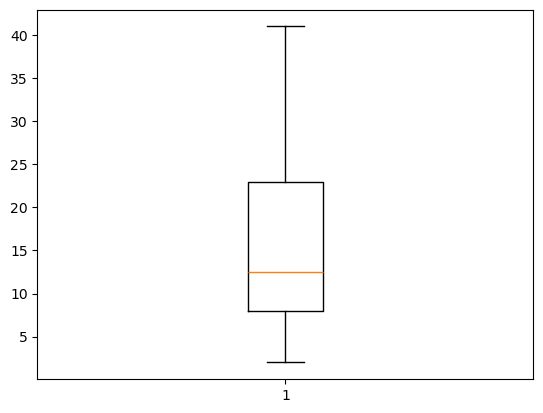

In [5]:
pattern_david = re.compile(r'\nDAVID\sSPEERS(.*)\n')

sent_david = [match.group(1) for match in pattern_david.finditer(text)]
len_list = [len(sent.split()) for sent in sent_david]
mean_len_david = np.mean(len_list)

plt.boxplot(len_list)
percentile_25 = np.quantile(len_list, 0.25)

foundation_counter_list = list()
for sent in sent_david:
    foundation_counter = defaultdict(int)
    mf_words = []
    if len(sent.split()) >= percentile_25:
        doc = nlp(sent)
        for token in doc:
            token = token.text.lower()
            if token in mfd2:
                foundation = mfd2[token]['foundation']
                mf_words.append(token)
                foundation_counter[foundation] += 1
    if len(mf_words)!= 0:
        print(sent)
        print(mf_words)
        print(list(foundation_counter.keys()))
        print()
    foundation_counter_list.append(foundation_counter)

# foundation_counter_list
# print(pd.DataFrame(foundation_counter_list))

, SHADOW MINISTER FOR CHILD PROTECTION: I think we have to be careful when we talk about the No campaign. I am no to this form of constitutional recognition, or it being in the Constitution. That doesn't necessarily make us all the No campaign, all the same.
['child', 'protection']
['care.virtue', 'authority.virtue']

 SHADOW MINISTER FOR CHILD PROTECTION: Well, I think there are a whole range of reasons why Aboriginal & Torres Strait Islander people, some people, find themselves disadvantaged & it goes to the core of this issue, the suggestion, the stereotype that we are all the same or that we have all had the same experiences growing up & that we are all at the same place in our lives.
['child', 'protection', 'disadvantaged']
['care.virtue', 'authority.virtue', 'fairness.vice']

: Yeah, there is. There is an intergenerational effect in that when my mother, she's passed away now, but when she used to talk about this, she would say I have to think about things differently, I have do t

[defaultdict(int, {'care.virtue': 1, 'authority.virtue': 1}),
 defaultdict(int,
             {'care.virtue': 1, 'authority.virtue': 1, 'fairness.vice': 1}),
 defaultdict(int, {'care.virtue': 1}),
 defaultdict(int, {}),
 defaultdict(int, {}),
 defaultdict(int, {}),
 defaultdict(int, {}),
 defaultdict(int, {}),
 defaultdict(int, {}),
 defaultdict(int, {}),
 defaultdict(int, {'loyalty.virtue': 1}),
 defaultdict(int, {}),
 defaultdict(int, {}),
 defaultdict(int, {}),
 defaultdict(int, {}),
 defaultdict(int, {}),
 defaultdict(int, {'loyalty.virtue': 1}),
 defaultdict(int, {}),
 defaultdict(int, {}),
 defaultdict(int, {}),
 defaultdict(int, {}),
 defaultdict(int, {}),
 defaultdict(int, {}),
 defaultdict(int, {}),
 defaultdict(int, {}),
 defaultdict(int, {'sanctity.virtue': 1}),
 defaultdict(int, {}),
 defaultdict(int, {}),
 defaultdict(int, {})]

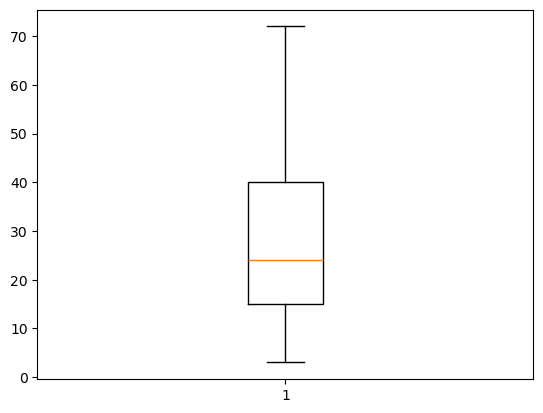

In [6]:
pattern_KERRYNNE = re.compile(r'\nKERRYNNE\sLIDDLE(.*)\n')

sent_kerrynne = [match.group(1) for match in pattern_KERRYNNE.finditer(text)]
len_list = [len(sent.split()) for sent in sent_kerrynne]

plt.boxplot(len_list)
percentile_25 = np.quantile(len_list, 0.25)

foundation_counter_list = list()
for sent in sent_kerrynne:
    foundation_counter = defaultdict(int)
    mf_words = []
    if len(sent.split()) >= percentile_25:
        doc = nlp(sent)
        for token in doc:
            token = token.text.lower()
            if token in mfd2:
                foundation = mfd2[token]['foundation']
                mf_words.append(token)
                foundation_counter[foundation] += 1
    if len(mf_words)!= 0:
        print(sent)
        print(mf_words)
        print(list(foundation_counter.keys()))
        print()
    foundation_counter_list.append(foundation_counter)

foundation_counter_list

### Transcript Search

In [12]:
with open('./data/all_dict.pickle') as f:
# with open('./data/pickle_240227/voice.pickle') as f:
    voice_dict = jsonpickle.decode(f.read())
key_list = [key for key in voice_dict]
for key, values in voice_dict.items():
    article_info = values
    title = article_info['title']
    if 'Indigenous senators speak out as battlelines' in title:
        print(title)

Indigenous senators speak out as battlelines drawn ahead of the Voice referendum:   The two sides of politics squared off in Parliament over the Indigenous Voice for the final time today before next month's referendum.


### Transcript parsing

In [1]:
"""TODO
- Load all_dict.pickle
- Catch all matches with r'\n(.*):' pattern from raw text.
- Inspect match.group(1) which is the person who gives the statement.
"""

In [50]:
with open('./data/all_dict.pickle') as f:
    all_dict = jsonpickle.decode(f.read())
key_list = [key for key in all_dict.keys()]
print("Article number: ", len(key_list))

keys_transcript = []
name_list = []
title_list = []
pattern = re.compile(r'\n([A-Z,\s^.:]*):\s([A-Z].*)')
# pattern = re.compile(r'\n([^.:]*):\s([A-Z].*)')
for key in key_list:
    text = all_dict[key]['text']
    title = all_dict[key]['title']
    matches = [match for match in pattern.finditer(text)]
    if len(matches) >= 5:
        keys_transcript.append(key)
        # if 'Indigenous senators speak out as battlelines' in title:
        #     print(text)
        #     for match in matches:
        #         print(match.group(0))
        for match in matches:
            statement = match.group(0)
            name = statement.split(":")[0]
            name_list.append(name)

print("Number of transcript: ", len(keys_transcript))
print("The number of names identified: ", len(set(name_list)))

Article number:  2360
Number of transcript:  34
The number of names identified:  181


In [47]:
name_count = defaultdict(int)
for name in name_list:
    name_count[name] += 1
count_rank = sorted(name_count.items(), key=lambda x: x[1], reverse=True)
count_rank

[('\nSARAH FERGUSON', 101),
 ('\nJASON OM', 46),
 ('\nNOEL PEARSON', 41),
 ('\nLAURA TINGLE', 37),
 ('\nDAVID SPEERS', 33),
 ('\nPETER MCCUTCHEON', 29),
 ('\nKERRYNNE LIDDLE', 27),
 ('\nTONY ABBOTT', 26),
 ('\nCARLY WILLIAMS', 21),
 ('\nBRIDGET BRENNAN', 20),
 ('\nRHIANNON SHINE', 19),
 ('\nA', 14),
 ('\nANTHONY ALBANESE', 12),
 ('\nADAM HARVEY', 12),
 ('\nEMILY BAKER', 10),
 ('\nBEA BALLANGARRY', 10),
 ('\nLINDA BURNEY', 10),
 ('\nPATRICK BEGLEY', 10),
 ('\nVOX POP', 8),
 ('\nPAT MCGRATH', 8),
 ('\nMARTIN BALLANGARRY', 8),
 ('\nDEAN PARKIN', 8),
 ('\nPAT ANDERSON', 8),
 ('\nMICK GOODA', 6),
 ('\nREPORTER', 6),
 ('\nJACINTA NAMPIJINPA PRICE', 5),
 ('\nTHOMAS MAYO', 5),
 ('\nLAURA TINGLE, CHIEF POLITICAL CORRESPONDENT', 5),
 ('\nNADIA DALY', 5),
 ('\nANTHONY ALBANESE, PRIME MINISTER', 4),
 ('\nPETER DUTTON, OPPOSITION LEADER', 4),
 ('\nEVELYN LECKIE', 4),
 ('\nNICOLA CHARLES', 4),
 ('\nKEN WYATT', 4),
 ('\nLINDA BURNEY, MINISTER FOR INDIGENOUS AUSTRALIANS', 4),
 ('\nDAVID CRISAFULLI', 4